<a href="https://colab.research.google.com/github/Simarjit1303/Data-Science/blob/main/exercises/machine-learning/Neural-Network/deep_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Networks
You should build an end-to-end machine learning pipeline using a deep learning model. In particular, you should do the following:
- Load the `fashion mnist` dataset from [TensorFlow](https://www.tensorflow.org/tutorials/keras/classification). The loaded dataset is already split into training and test sets.
- Build an end-to-end machine learning pipeline, including a [deep learning](https://www.tensorflow.org/tutorials/keras/classification) model.
- Optimize your pipeline by validating your design decisions.
- Test the best pipeline on the test set and report various [evaluation metrics](https://scikit-learn.org/0.15/modules/model_evaluation.html).  
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [24]:
!pip install tensorflow

In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
fashion_mnist_df = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_df.load_data()

In [27]:
print(f"Size of train_images - {train_images.shape}")

Size of train_images - (60000, 28, 28)


## Preprocessing the data

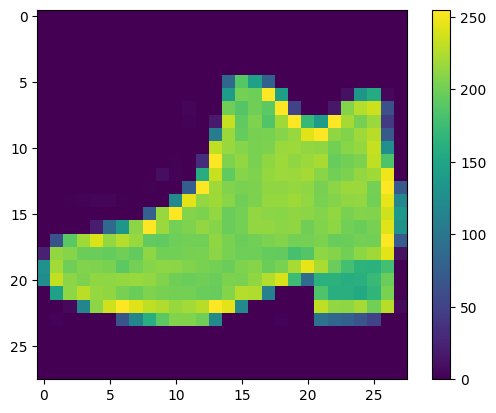

In [28]:
plt.figure()
plt.imshow(train_images[15])
plt.colorbar()
plt.grid(False)
plt.show()

In [29]:
# Scaling the values to a range of 0 to 1 before feeding them to the neural network model
train_images = train_images / 255.0

test_images = test_images / 255.0

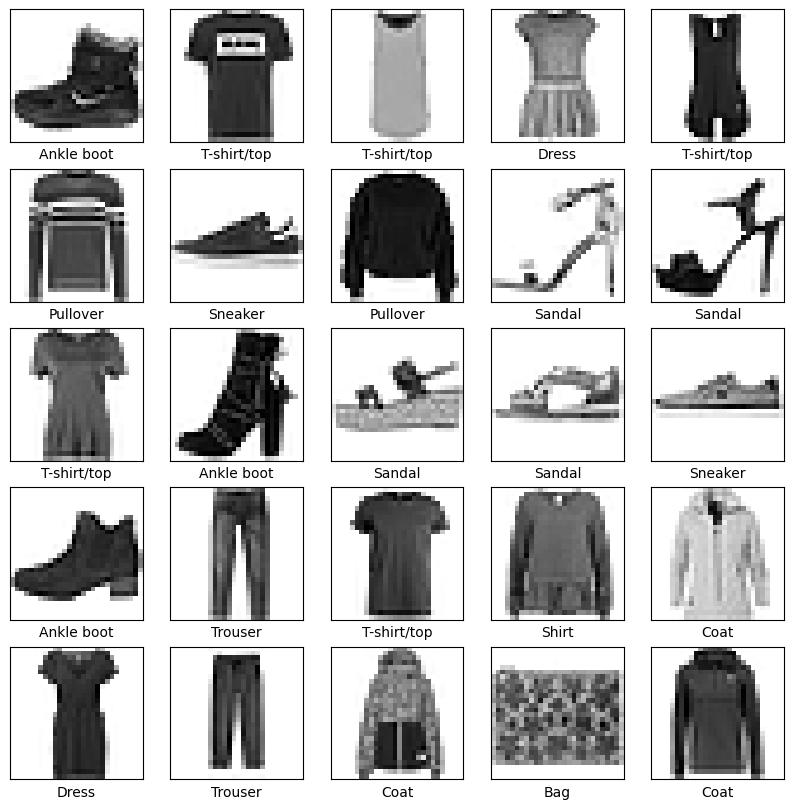

In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Building Model

In [31]:
results  = []
histories = {}


model_configurations = [
    {
        'name': 'Model 1: 3 Dense layers (256, 128, 64) with relu',
        'layers': [
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(10,activation='softmax')
        ]
    },
    {
        'name': 'Model 2: 3 Dense layers (256, 128, 64) with tanh',
        'layers': [
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(256, activation='tanh'),
            tf.keras.layers.Dense(128, activation='tanh'),
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dense(10,activation='softmax')
        ]
    },
    {
        'name': 'Model 3: 3 Dense layers (256, 128, 64) with sigmoid',
        'layers': [
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(256, activation='sigmoid'),
            tf.keras.layers.Dense(128, activation='sigmoid'),
            tf.keras.layers.Dense(64, activation='sigmoid'),
            tf.keras.layers.Dense(10, activation='softmax')
        ]
    }
]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
for config in model_configurations:
    print(f"Training {config['name']}...")

    model = tf.keras.Sequential(config['layers'])

    use_from_logits = not (isinstance(model.layers[-1], tf.keras.layers.Dense)
                            and model.layers[-1].activation == tf.keras.activations.softmax)


    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=use_from_logits),
                  metrics=['accuracy'])


    history = model.fit(train_images, train_labels, epochs=10, verbose=1,
                        validation_data=(train_images, train_labels))

    histories[config['name']] = history.history


    val_acc = history.history.get('val_accuracy', [np.nan])[-1]
    train_loss = history.history['loss'][-1]

    results.append({
        'model_name': config['name'],
        'validation_accuracy': val_acc,
        'training_loss': train_loss,
        'model_config_layers': config['layers']
    })

    print(f"Finished training {config['name']}. Validation Accuracy: {val_acc:.4f}, Training Loss: {train_loss:.4f}")

Training Model 1: 3 Dense layers (256, 128, 64) with relu...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7841 - loss: 0.6090 - val_accuracy: 0.8697 - val_loss: 0.3586
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8640 - loss: 0.3681 - val_accuracy: 0.8706 - val_loss: 0.3541
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8767 - loss: 0.3347 - val_accuracy: 0.8907 - val_loss: 0.2950
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8874 - loss: 0.3022 - val_accuracy: 0.8921 - val_loss: 0.2845
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8915 - loss: 0.2930 - val_accuracy: 0.8987 - val_loss: 0.2662
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8970 - loss: 0.2727 - val_accuracy: 0.9067 - val_loss: 0.2430
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9011 - loss: 0.2632 - val_accuracy: 0.9047 - val_loss: 0.2478
Epoch 8/10
1875/1875 ━━━━━━━

In [33]:
results_df = pd.DataFrame(results)
best_model_result = results_df.sort_values(by='validation_accuracy', ascending=False,  na_position='last').iloc[0]

print("\n--- Best Model ---")
print(f"Model Name: {best_model_result['model_name']}")
print(f"Validation Accuracy: {best_model_result['validation_accuracy']:.4f}")
print(f"Training Loss: {best_model_result['training_loss']:.4f}")


--- Best Model ---
Model Name: Model 1: 3 Dense layers (256, 128, 64) with relu
Validation Accuracy: 0.9190
Training Loss: 0.2337


In [34]:
best_model_config_layers = best_model_result['model_config_layers']

best_model_for_evaluation = tf.keras.Sequential(best_model_config_layers)

use_from_logits_eval = not (isinstance(best_model_for_evaluation.layers[-1], tf.keras.layers.Dense)
                            and best_model_for_evaluation.layers[-1].activation == tf.keras.activations.softmax)

best_model_for_evaluation.compile(optimizer='adam',
                                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=use_from_logits_eval),
                                  metrics=['accuracy'])

test_loss, test_acc = best_model_for_evaluation.evaluate(test_images, test_labels, verbose=2)

print(f'\nTest loss for the best model ({best_model_result["model_name"]}):', test_loss)
print(f'Test accuracy for the best model ({best_model_result["model_name"]}):', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8866 - loss: 0.3327

Test loss for the best model (Model 1: 3 Dense layers (256, 128, 64) with relu): 0.33273041248321533
Test accuracy for the best model (Model 1: 3 Dense layers (256, 128, 64) with relu): 0.8866000175476074


In [35]:
if not (isinstance(best_model_for_evaluation.layers[-1], tf.keras.layers.Dense) and best_model_for_evaluation.layers[-1].activation == tf.keras.activations.softmax):
    probability_model = tf.keras.Sequential([best_model_for_evaluation, tf.keras.layers.Softmax()])
else:
    probability_model = best_model_for_evaluation # Model already outputs probabilities

predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [36]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

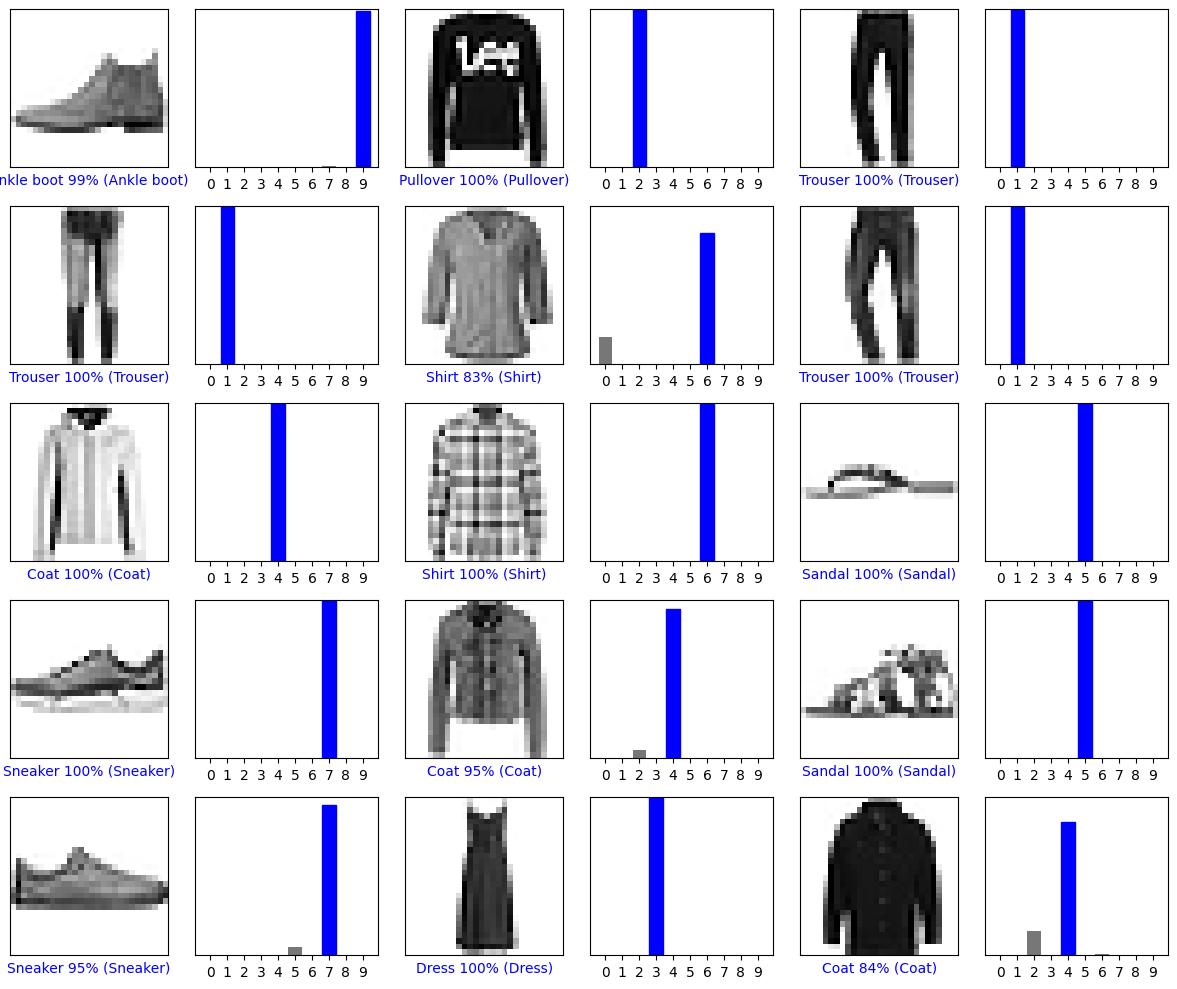

In [37]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()